In [5]:
print("hello world")

hello world


In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python import  pywrap_tensorflow

In [3]:
import os
print("Current Directory",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","Valid")

Current Directory d:\Potato leaf detection Project


In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names = None,
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)


Found 900 files belonging to 3 classes.


In [6]:
labels = training_set.class_names
print(labels)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    class_names = None,
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear",
)


Found 300 files belonging to 3 classes.


In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape = [128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


c:\Users\shiva\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)


In [12]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 13s 368ms/step - accuracy: 0.3452 - loss: 1.2831 - val_accuracy: 0.6200 - val_loss: 0.7703
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 712ms/step - accuracy: 0.6987 - loss: 0.6701 - val_accuracy: 0.7367 - val_loss: 0.6102
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 754ms/step - accuracy: 0.7871 - loss: 0.4861 - val_accuracy: 0.8267 - val_loss: 0.4116
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 765ms/step - accuracy: 0.8438 - loss: 0.3922 - val_accuracy: 0.8000 - val_loss: 0.5110
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 759ms/step - accuracy: 0.8421 - loss: 0.4786 - val_accuracy: 0.8133 - val_loss: 0.4362
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 744ms/step - accuracy: 0.8628 - loss: 0.3371 - val_accuracy: 0.9067 - val_loss: 0.2386
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 755ms/step - accuracy: 0.9192 - loss: 0.2435 - val_accuracy: 0.9100 - val_loss: 0.2168
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 22s 744ms/step - accuracy: 0.9441 - loss: 0.1420 - val_accu

In [15]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy: ',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.9369 - loss: 0.1669
Training accuracy:  0.9322222471237183


In [16]:
valid_loss, valid_acc = cnn.evaluate(validation_set)
print('Validation accuracy: ',valid_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.9407 - loss: 0.1741
Validation accuracy:  0.9066666960716248


In [17]:
cnn.save('trained_plant_disease_model.keras')

In [18]:
training_history.history

{'accuracy': [0.41999998688697815,
  0.7133333086967468,
  0.7833333611488342,
  0.8588888645172119,
  0.8577777743339539,
  0.8788889050483704,
  0.9122222065925598,
  0.9444444179534912,
  0.9599999785423279,
  0.9544444680213928],
 'loss': [1.1155236959457397,
  0.6178475022315979,
  0.5040342807769775,
  0.3560355603694916,
  0.3833194971084595,
  0.28530779480934143,
  0.2399216890335083,
  0.14983393251895905,
  0.11906696856021881,
  0.1156996488571167],
 'val_accuracy': [0.6200000047683716,
  0.7366666793823242,
  0.8266666531562805,
  0.800000011920929,
  0.8133333325386047,
  0.9066666960716248,
  0.9100000262260437,
  0.9066666960716248,
  0.8700000047683716,
  0.9066666960716248],
 'val_loss': [0.7702624797821045,
  0.6102132201194763,
  0.4116123914718628,
  0.5109742283821106,
  0.4361661374568939,
  0.23861083388328552,
  0.2167661041021347,
  0.22218942642211914,
  0.3740335702896118,
  0.25047194957733154]}

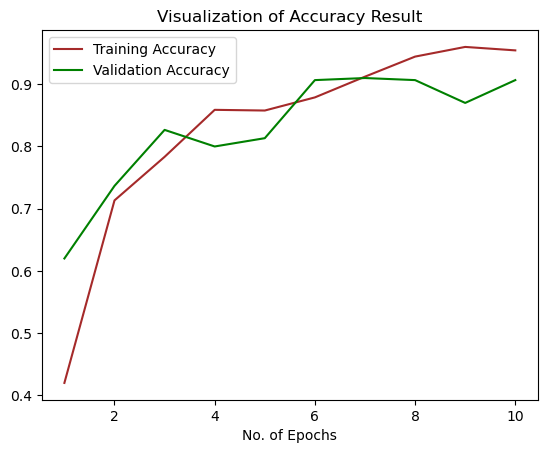

In [19]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()
